# Swish-based classifier using cosine-annealed LR with restarts
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 2
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
trainData = BatchYielder(h5py.File(dirLoc + 'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 15.209s 


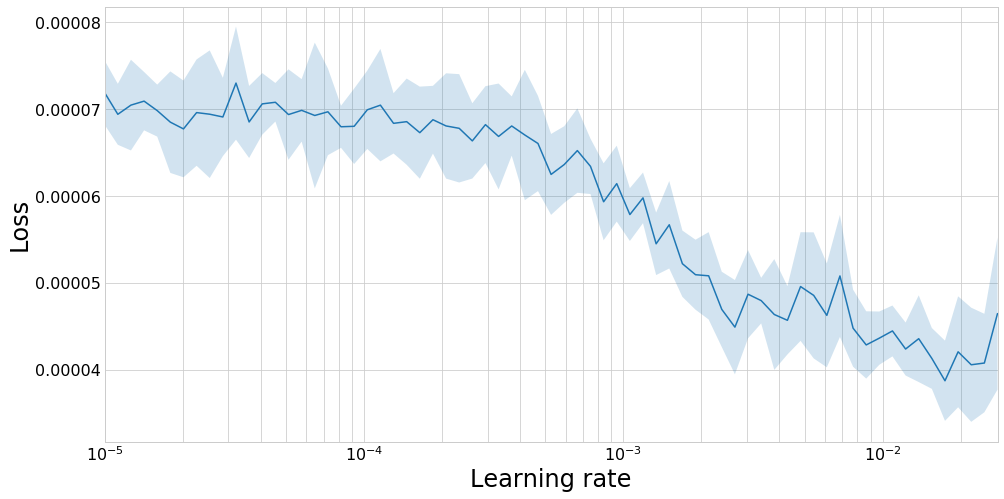

______________________________________



In [5]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.0527690987994985e-05
2 New best found: 3.66067542809836e-05
3 New best found: 3.5452815589883626e-05
5 New best found: 3.455390610186354e-05
6 New best found: 3.420145621707956e-05
7 New best found: 3.41842311220356e-05
10 New best found: 3.4111118152970534e-05
11 New best found: 3.3693034605349074e-05
12 New best found: 3.357997982804192e-05
13 New best found: 3.3474291803674945e-05
14 New best found: 3.328773209968263e-05
15 New best found: 3.325652302482285e-05
23 New best found: 3.325626533009518e-05
24 New best found: 3.313985145475399e-05
27 New best found: 3.296079396240953e-05
28 New best found: 3.2849000832078415e-05
29 New best found: 3.281121221608239e-05
30 New best found: 3.281037384813196e-05
31 New best found: 3.280242065524597e-05
55 New best found: 3.263182843504765e-05
58 New best found: 3.262222260580248e-05
60 New best found: 3.2607069091121

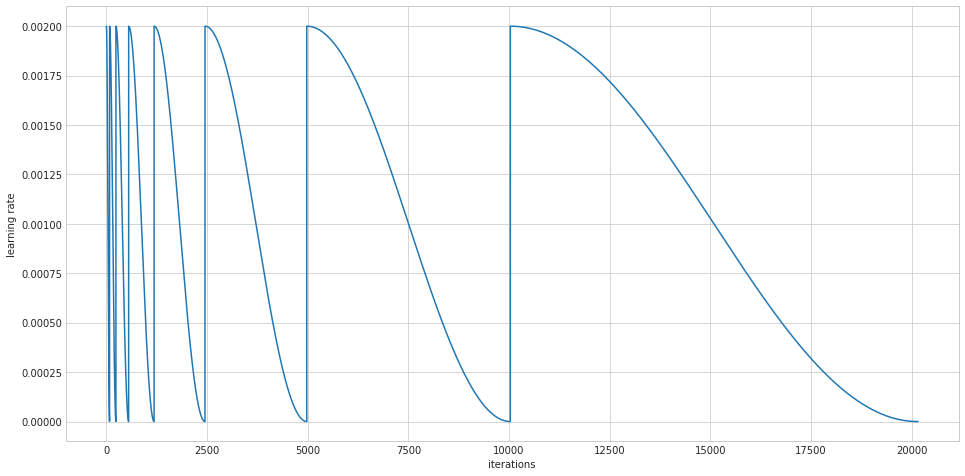

Fold took 215.775s

Running fold 2 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189845). Check your callbacks.
  % delta_t_median)


1 New best found: 4.100222850885256e-05
2 New best found: 3.7165973190454656e-05
3 New best found: 3.644944971768879e-05
4 New best found: 3.624903725765487e-05
5 New best found: 3.585109085313381e-05
6 New best found: 3.482750767536661e-05
7 New best found: 3.460175575952239e-05
10 New best found: 3.438591109375219e-05
11 New best found: 3.391683919134297e-05
12 New best found: 3.3642911087614126e-05
13 New best found: 3.3640768248916085e-05
14 New best found: 3.3556589636168906e-05
15 New best found: 3.350514856677753e-05
21 New best found: 3.345862458618708e-05
23 New best found: 3.331620437410367e-05
24 New best found: 3.3008750021157695e-05
25 New best found: 3.298270192374136e-05
26 New best found: 3.286352494415356e-05
28 New best found: 3.282530402189446e-05
29 New best found: 3.280045147905707e-05
30 New best found: 3.275933959089407e-05
31 New best found: 3.275054431001775e-05
51 New best found: 3.267960440234247e-05
53 New best found: 3.264029631596561e-05
55 New best found:

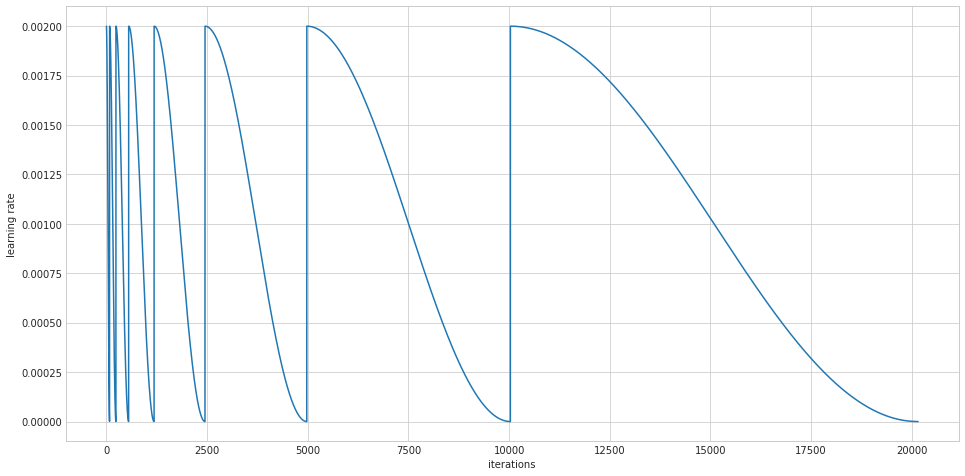

Fold took 211.690s

Running fold 3 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.202665). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101689). Check your callbacks.
  % delta_t_median)


1 New best found: 4.1579105716245636e-05
2 New best found: 3.761651306680786e-05
3 New best found: 3.6656357093598895e-05
4 New best found: 3.647506692207038e-05
5 New best found: 3.5931340426172365e-05
6 New best found: 3.517202550826596e-05
7 New best found: 3.501173739168612e-05
9 New best found: 3.4876624961318695e-05
11 New best found: 3.43020357458388e-05
12 New best found: 3.400108844306479e-05
13 New best found: 3.383255668640477e-05
15 New best found: 3.378740456331986e-05
21 New best found: 3.359574938549453e-05
24 New best found: 3.359230482104728e-05
25 New best found: 3.336590387746824e-05
26 New best found: 3.326891391918093e-05
27 New best found: 3.3147485548171093e-05
28 New best found: 3.30319969489871e-05
29 New best found: 3.299325351531891e-05
51 New best found: 3.288356682817708e-05
53 New best found: 3.282406441933006e-05
54 New best found: 3.2701923723234504e-05
55 New best found: 3.268006931170568e-05
56 New best found: 3.262098066859132e-05
58 New best found: 3

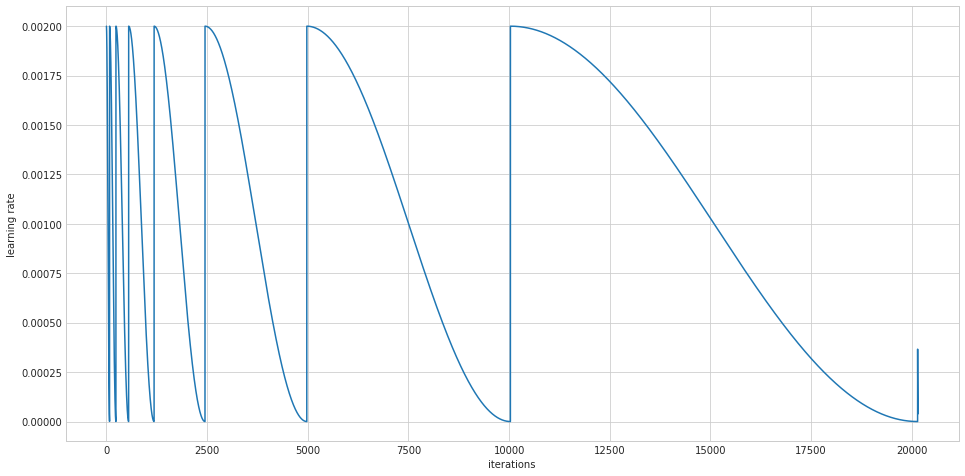

Fold took 238.978s

Running fold 4 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.235116). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117956). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9768762615858575e-05
2 New best found: 3.708300838043215e-05
3 New best found: 3.549693189997924e-05
5 New best found: 3.47844362288015e-05
6 New best found: 3.401477887236979e-05
7 New best found: 3.387405325920554e-05
10 New best found: 3.338363837247016e-05
11 New best found: 3.325049553386634e-05
12 New best found: 3.3037902310024944e-05
13 New best found: 3.291853218834149e-05
14 New best found: 3.285454562937957e-05
15 New best found: 3.283006007986842e-05
23 New best found: 3.264573931592167e-05
25 New best found: 3.2465183886233716e-05
26 New best found: 3.223391914143576e-05
27 New best found: 3.221128302975558e-05
28 New best found: 3.21718228951795e-05
29 New best found: 3.2076684640196616e-05
30 New best found: 3.207035347004421e-05
52 New best found: 3.199368182977196e-05
53 New best found: 3.190708846959751e-05
54 New best found: 3.187990839142003e-05
55 New best found: 3.184806610515807e-05
57 New best found: 3.17537470953539e-05
CosineAnneal stalling

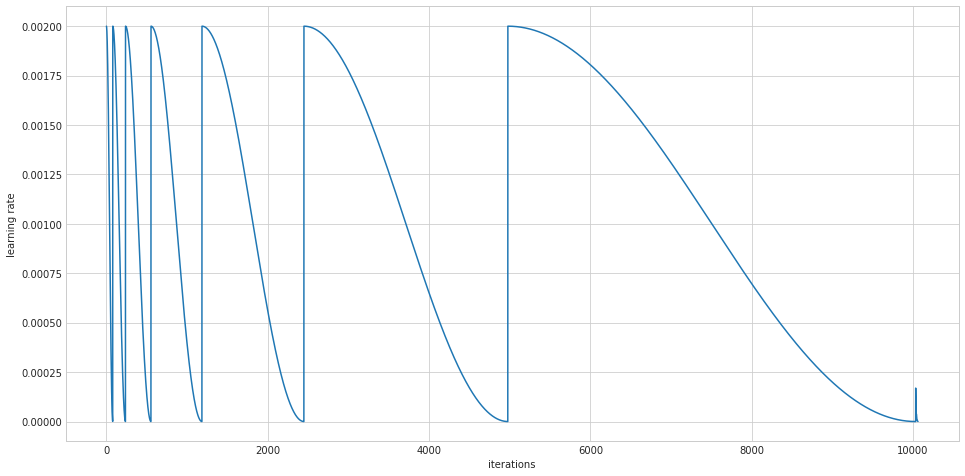

Fold took 148.788s

Running fold 5 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.267217). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.134025). Check your callbacks.
  % delta_t_median)


1 New best found: 3.9848531720053873e-05
2 New best found: 3.646948392561171e-05
3 New best found: 3.5697737475857136e-05
4 New best found: 3.5549160381197e-05
5 New best found: 3.495207123487489e-05
6 New best found: 3.435718509572325e-05
7 New best found: 3.424749083642382e-05
11 New best found: 3.393557836825494e-05
12 New best found: 3.3428918158460874e-05
13 New best found: 3.333980588940903e-05
14 New best found: 3.3232882994343526e-05
15 New best found: 3.3170202095789135e-05
23 New best found: 3.300623266259208e-05
24 New best found: 3.297497825551545e-05
25 New best found: 3.295153145445511e-05
27 New best found: 3.289636254994548e-05
28 New best found: 3.279098709681421e-05
29 New best found: 3.273216293309815e-05
30 New best found: 3.270830861947616e-05
31 New best found: 3.268954444938572e-05
49 New best found: 3.252567681920482e-05
56 New best found: 3.2508264812349804e-05
57 New best found: 3.243088692252059e-05
58 New best found: 3.2415895931626435e-05
60 New best found:

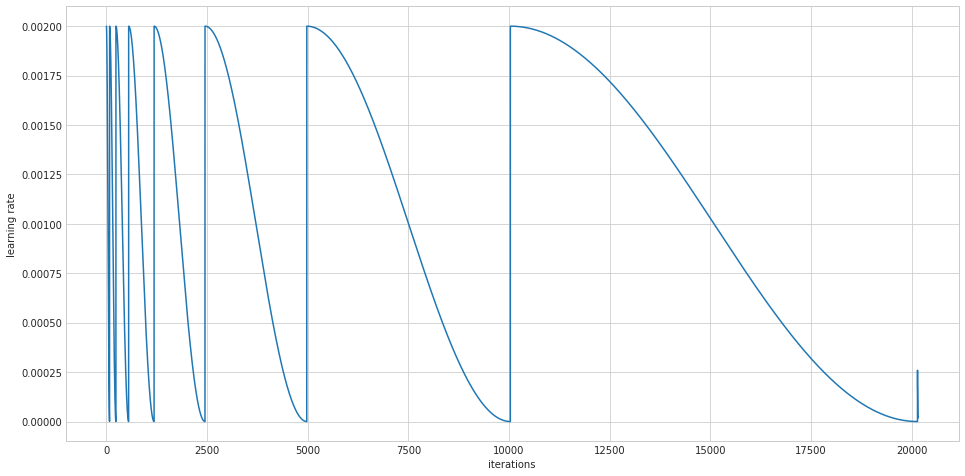

Fold took 247.373s

Running fold 6 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.287124). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143969). Check your callbacks.
  % delta_t_median)


1 New best found: 4.151199837797321e-05
2 New best found: 3.7748830857162827e-05
3 New best found: 3.691224432259333e-05
5 New best found: 3.6061845945368984e-05
6 New best found: 3.533087060350226e-05
7 New best found: 3.522269237873843e-05
8 New best found: 3.507565623585833e-05
11 New best found: 3.471386123273987e-05
12 New best found: 3.447895712743048e-05
13 New best found: 3.4459819333278574e-05
14 New best found: 3.434358689119108e-05
15 New best found: 3.427431862073718e-05
21 New best found: 3.4166458071558737e-05
23 New best found: 3.413339911057847e-05
24 New best found: 3.403117239504354e-05
26 New best found: 3.3797653985675423e-05
27 New best found: 3.371182413538918e-05
28 New best found: 3.350563591229729e-05
51 New best found: 3.340818051365204e-05
54 New best found: 3.3364488084043845e-05
55 New best found: 3.32037841930287e-05
56 New best found: 3.317869489837903e-05
57 New best found: 3.314781957888044e-05
CosineAnneal stalling after 127 epochs, entering redux deca

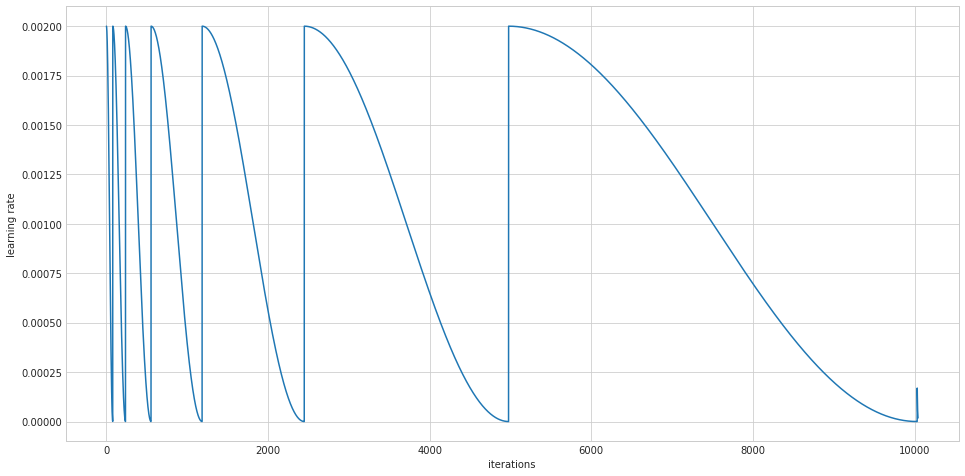

Fold took 132.274s

Running fold 7 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.321717). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.161477). Check your callbacks.
  % delta_t_median)


1 New best found: 3.928426430065883e-05
2 New best found: 3.6061655098455956e-05
3 New best found: 3.526126038632355e-05
4 New best found: 3.471051952365088e-05
5 New best found: 3.427374488965143e-05
6 New best found: 3.3363578746502754e-05
7 New best found: 3.329655380075565e-05
9 New best found: 3.311871565092588e-05
11 New best found: 3.298216067341855e-05
12 New best found: 3.26071688963566e-05
13 New best found: 3.2575458931387405e-05
14 New best found: 3.2259599432291e-05
15 New best found: 3.2234659466485025e-05
23 New best found: 3.190493696311023e-05
24 New best found: 3.173610719240969e-05
27 New best found: 3.1688554291031326e-05
28 New best found: 3.160774277930614e-05
29 New best found: 3.1504817778477445e-05
30 New best found: 3.1484136520884934e-05
31 New best found: 3.1478418516053355e-05
50 New best found: 3.130618945870083e-05
51 New best found: 3.120474120660219e-05
56 New best found: 3.118585214324412e-05
59 New best found: 3.1172220952430505e-05
60 New best found:

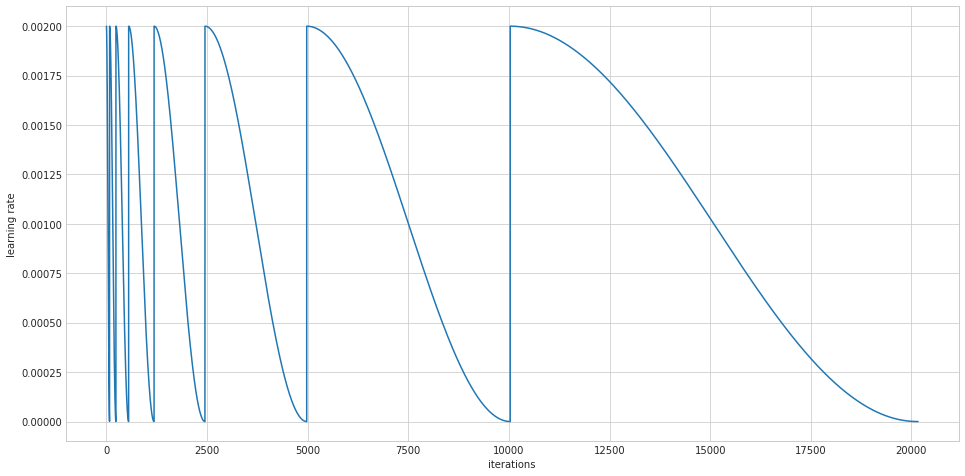

Fold took 292.628s

Running fold 8 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.438218). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220168). Check your callbacks.
  % delta_t_median)


1 New best found: 4.0402099616690755e-05
2 New best found: 3.627676720408813e-05
3 New best found: 3.5563487404302816e-05
4 New best found: 3.535664773318339e-05
6 New best found: 3.434685573307689e-05
7 New best found: 3.4288223709912236e-05
11 New best found: 3.397930096923662e-05
12 New best found: 3.370907601556795e-05
13 New best found: 3.353961662621585e-05
14 New best found: 3.3461937413052215e-05
15 New best found: 3.3403556411243847e-05
22 New best found: 3.3401123445201334e-05
23 New best found: 3.3264038023234814e-05
25 New best found: 3.3243646137428996e-05
26 New best found: 3.314238184994866e-05
28 New best found: 3.286880734798934e-05
46 New best found: 3.2741394724699124e-05
55 New best found: 3.268626734161492e-05
56 New best found: 3.2669188311975586e-05
57 New best found: 3.2606331447166905e-05
58 New best found: 3.260135214917542e-05
59 New best found: 3.258183388116807e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=7.659675222511076e-05
Earl

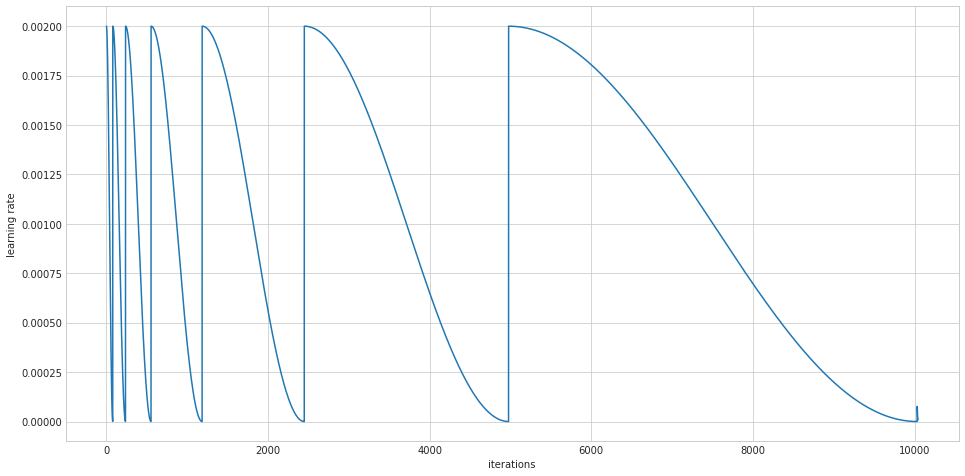

Fold took 139.061s

Running fold 9 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.328055). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164547). Check your callbacks.
  % delta_t_median)


1 New best found: 4.033331066985139e-05
2 New best found: 3.706927387855388e-05
3 New best found: 3.649476263817058e-05
4 New best found: 3.605498165996207e-05
5 New best found: 3.5734486128558774e-05
6 New best found: 3.538697270523522e-05
7 New best found: 3.517355571518688e-05
10 New best found: 3.498468831874564e-05
12 New best found: 3.433445273212839e-05
13 New best found: 3.418367556608996e-05
14 New best found: 3.4126216954807836e-05
15 New best found: 3.4114497155783215e-05
22 New best found: 3.411101432543028e-05
23 New best found: 3.391907893336296e-05
24 New best found: 3.3907640102214044e-05
26 New best found: 3.373504225415772e-05
27 New best found: 3.3708354197160266e-05
28 New best found: 3.359160745162575e-05
29 New best found: 3.3563425515813954e-05
30 New best found: 3.354009040373947e-05
49 New best found: 3.342442970884425e-05
52 New best found: 3.3356890480761195e-05
53 New best found: 3.329141389170577e-05
60 New best found: 3.328456195026273e-05
61 New best foun

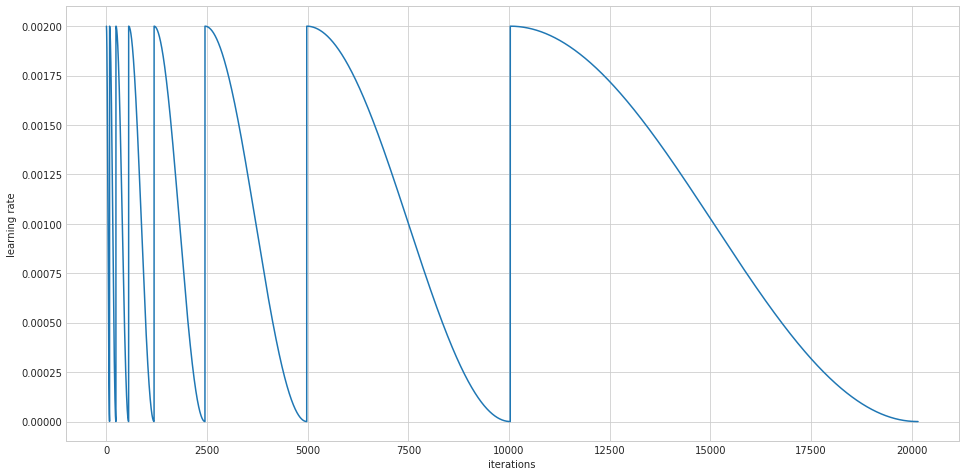

Fold took 276.526s

Running fold 10 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.328889). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164882). Check your callbacks.
  % delta_t_median)


1 New best found: 3.919324287081812e-05
2 New best found: 3.596742411750885e-05
3 New best found: 3.5058922838985325e-05
4 New best found: 3.4628291368199344e-05
5 New best found: 3.3975420462404916e-05
6 New best found: 3.3232422167775106e-05
7 New best found: 3.3176731297946104e-05
9 New best found: 3.306089212389065e-05
10 New best found: 3.2898957087211746e-05
12 New best found: 3.2727447886622884e-05
13 New best found: 3.239964527932536e-05
14 New best found: 3.221381895102749e-05
15 New best found: 3.2187809962093796e-05
23 New best found: 3.205694459517569e-05
24 New best found: 3.1902930393013195e-05
25 New best found: 3.186401823952847e-05
27 New best found: 3.1789505382530906e-05
28 New best found: 3.1620067845609236e-05
51 New best found: 3.1587245910312405e-05
52 New best found: 3.1501528104874707e-05
54 New best found: 3.141700510897986e-05
55 New best found: 3.141581749862943e-05
59 New best found: 3.138777521825534e-05
60 New best found: 3.136487693076966e-05
61 New best

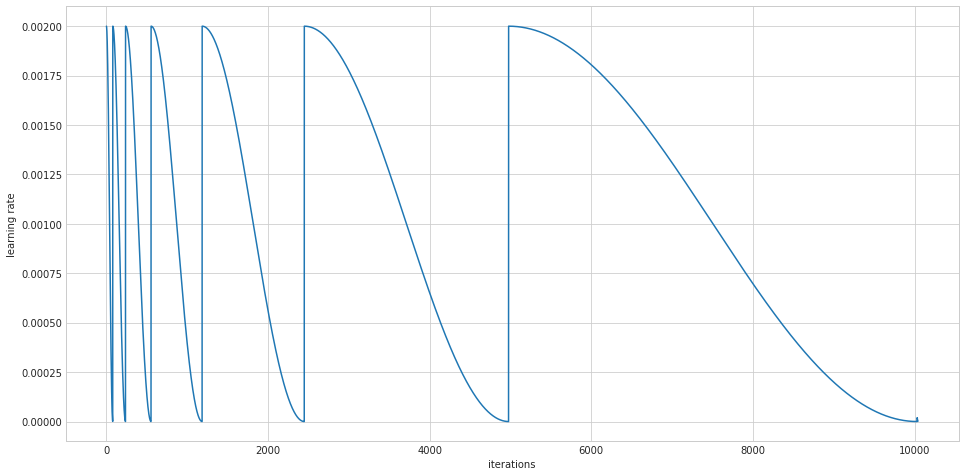

Fold took 131.247s


______________________________________
Training finished
Cross-validation took 2037.041s 


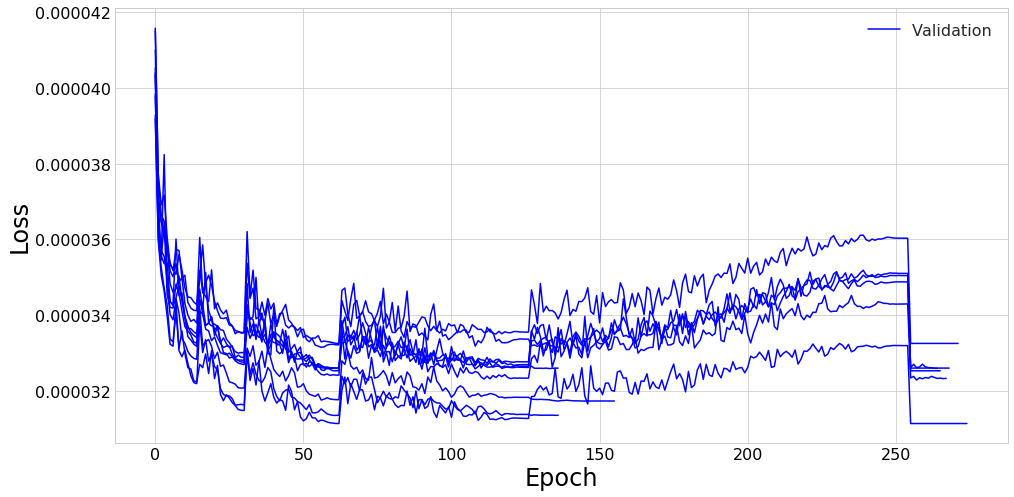

Mean loss = 3.23e-05 +- 2e-07
Mean wAUC = 0.0655 +- 0.0008
Mean AUC = 0.1025 +- 0.001
Mean AMS = 3.71 +- 0.03
Mean cut = 0.952 +- 0.005
______________________________________



In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          cosAnnealMult=2, plotLR=1, reduxDecay=1,
                                          patience=patience, verbose=1, amsSize=250000)

Comparing to the Swish model trained with LR cycling (Model_3), the cosine annealing and restarting reaches a lower loss (3.23e-5 c.f. 3.26e-5) and a higher AMS (3.71 c.f. 3.57)

## Construct ensemble

In [7]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [8]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 6 with loss = 3.113342969518271e-05
Model 1 is 9 with loss = 3.1348538483897614e-05
Model 2 is 3 with loss = 3.172640918201068e-05
Model 3 is 4 with loss = 3.2283093731530244e-05
Model 4 is 1 with loss = 3.252710453896118e-05
Model 5 is 2 with loss = 3.257728842733674e-05
Model 6 is 7 with loss = 3.258183388116807e-05
Model 7 is 0 with loss = 3.259842610052042e-05
Model 8 is 5 with loss = 3.314781957888044e-05
Model 9 is 8 with loss = 3.325023349599883e-05


## Response on validation data

In [9]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [10]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.001399642651799877s per sample

Predicting batch 2 out of 10
Prediction took 0.0002521628808000969s per sample

Predicting batch 3 out of 10
Prediction took 0.00031908076420004365s per sample

Predicting batch 4 out of 10
Prediction took 0.0002611007821997191s per sample

Predicting batch 5 out of 10
Prediction took 0.00024752526039992516s per sample

Predicting batch 6 out of 10
Prediction took 0.0003153285635999055s per sample

Predicting batch 7 out of 10
Prediction took 0.0003828386495999439s per sample

Predicting batch 8 out of 10
Prediction took 0.0003862254928000766s per sample

Predicting batch 9 out of 10
Prediction took 0.00046429766540022685s per sample

Predicting batch 10 out of 10
Prediction took 0.000249020377999841s per sample



In [17]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.900424057754224, weighted 0.934276614357821


In [18]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.7737133310247355, 0.9514275)

In [19]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=3.8+-0.2, at mean cut of 0.95+-0.01
Exact mean cut 0.9523912743898109, corresponds to AMS of 3.7242194839980636
CPU times: user 2.26 s, sys: 9.15 s, total: 11.4 s
Wall time: 2min 44s


(3.8, 0.95)

The performance differences between cosine annealing on the validation data are more closely tied;  the overall AMS is slightly worse (3.77 c.f. 3.78) but the AMS corresonding to the mean cut is slightly higher (3.724 c.f. 3.721).

The performance of the training data showed improvements, as well, so it is likely that the LR schedule works better than a flat LR. It is possbile that the benefits might become more apparent once later methods are included in the training and architecture.

# Test scoring

In [6]:
testData = BatchYielder(h5py.File(dirLoc + 'testing.hdf5', "r+"))

In [7]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000245731211618179s per sample

Predicting batch 2 out of 10
Prediction took 0.0001842227174727172s per sample

Predicting batch 3 out of 10
Prediction took 0.0001888145191817867s per sample

Predicting batch 4 out of 10
Prediction took 0.00020873693074549505s per sample

Predicting batch 5 out of 10
Prediction took 0.00019280612972725065s per sample

Predicting batch 6 out of 10
Prediction took 0.00017676388605455444s per sample

Predicting batch 7 out of 10
Prediction took 0.00020645363989090336s per sample

Predicting batch 8 out of 10
Prediction took 0.00019000308530911836s per sample

Predicting batch 9 out of 10
Prediction took 0.00016471297538181797s per sample

Predicting batch 10 out of 10
Prediction took 0.00022891151843630887s per sample

CPU times: user 2min 15s, sys: 5.67 s, total: 2min 20s
Wall time: 1min 49s


In [9]:
scoreTestOD(testData.source, 0.9523912743898109)

Public:Private AMS: 3.598078076831359 : 3.684632093115734


(3.598078076831359, 3.684632093115734)

# Save/Load

In [4]:
name = "weights/Swish_CLR"

In [21]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=True)

In [5]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)